In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


In [8]:
pk=pd.read_csv("/Users/abinashpant/Desktop/diabetes.csv")
pk

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
pk.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Age', ylabel='Outcome'>

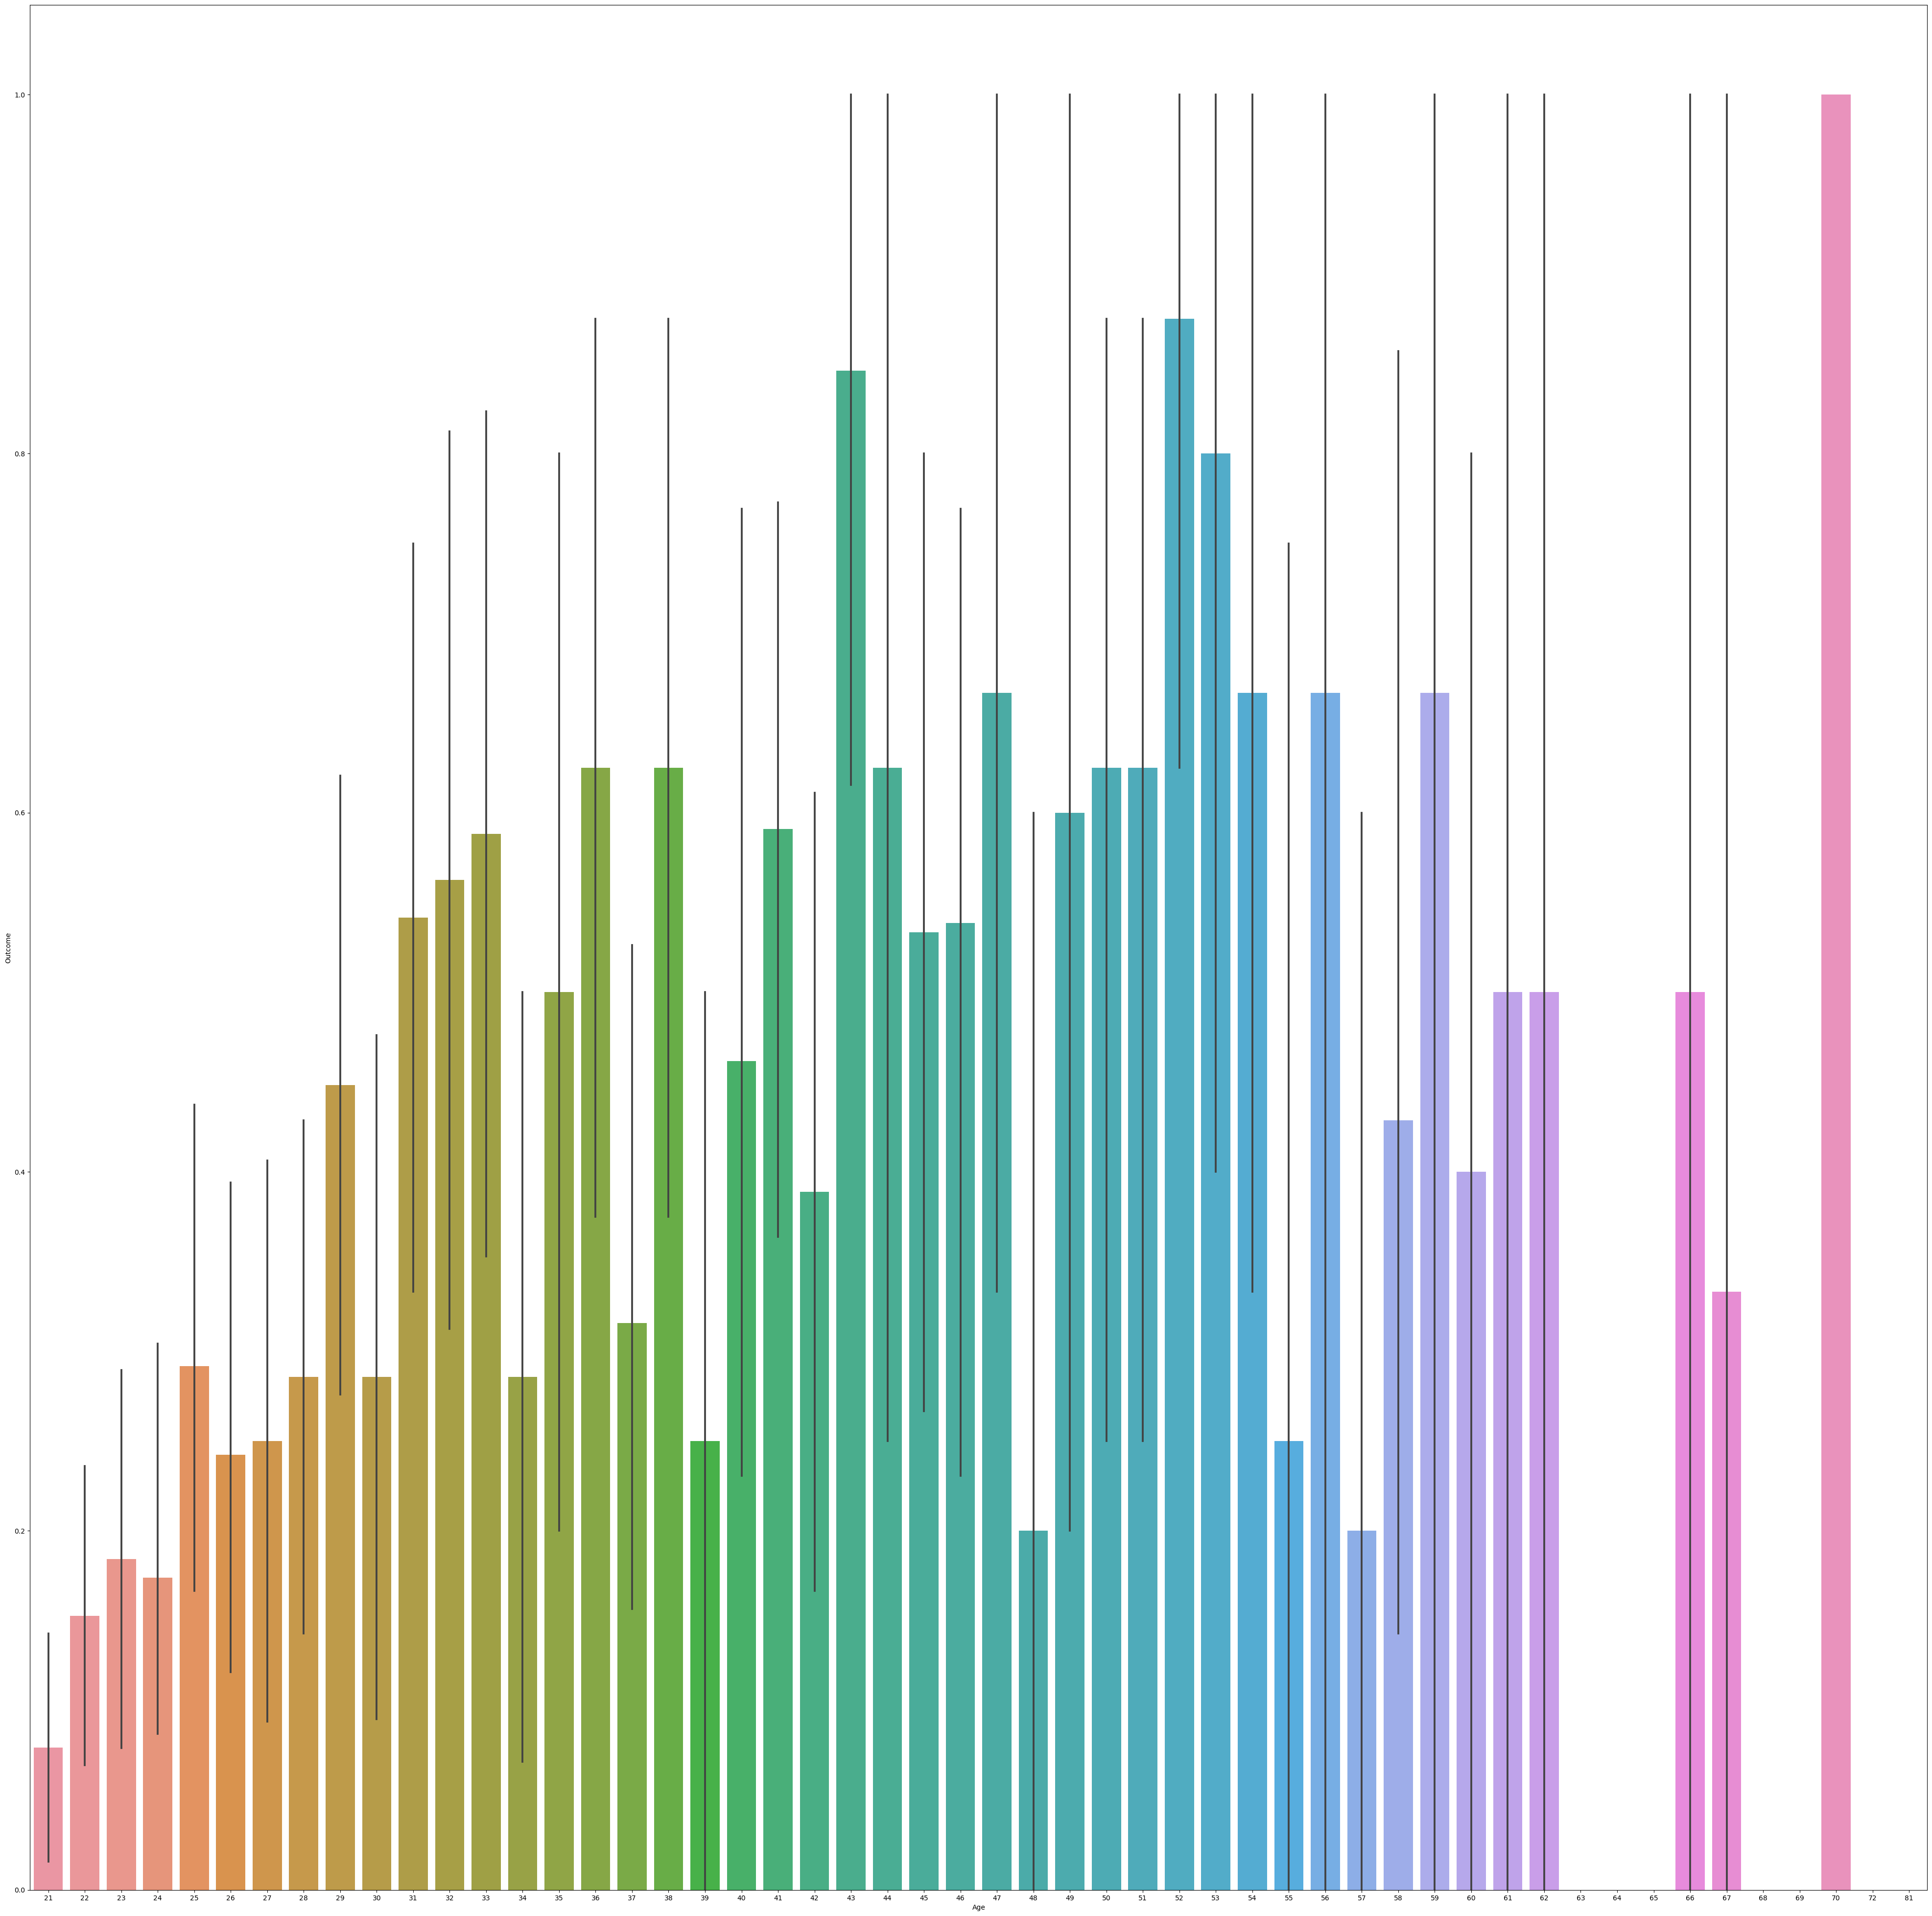

In [11]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(50,50)
sns.barplot(pk,x="Age",y="Outcome")

In [12]:
#we can see that generally age group of 70 has highest chances of diabetes

In [13]:
pk["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='Count'>

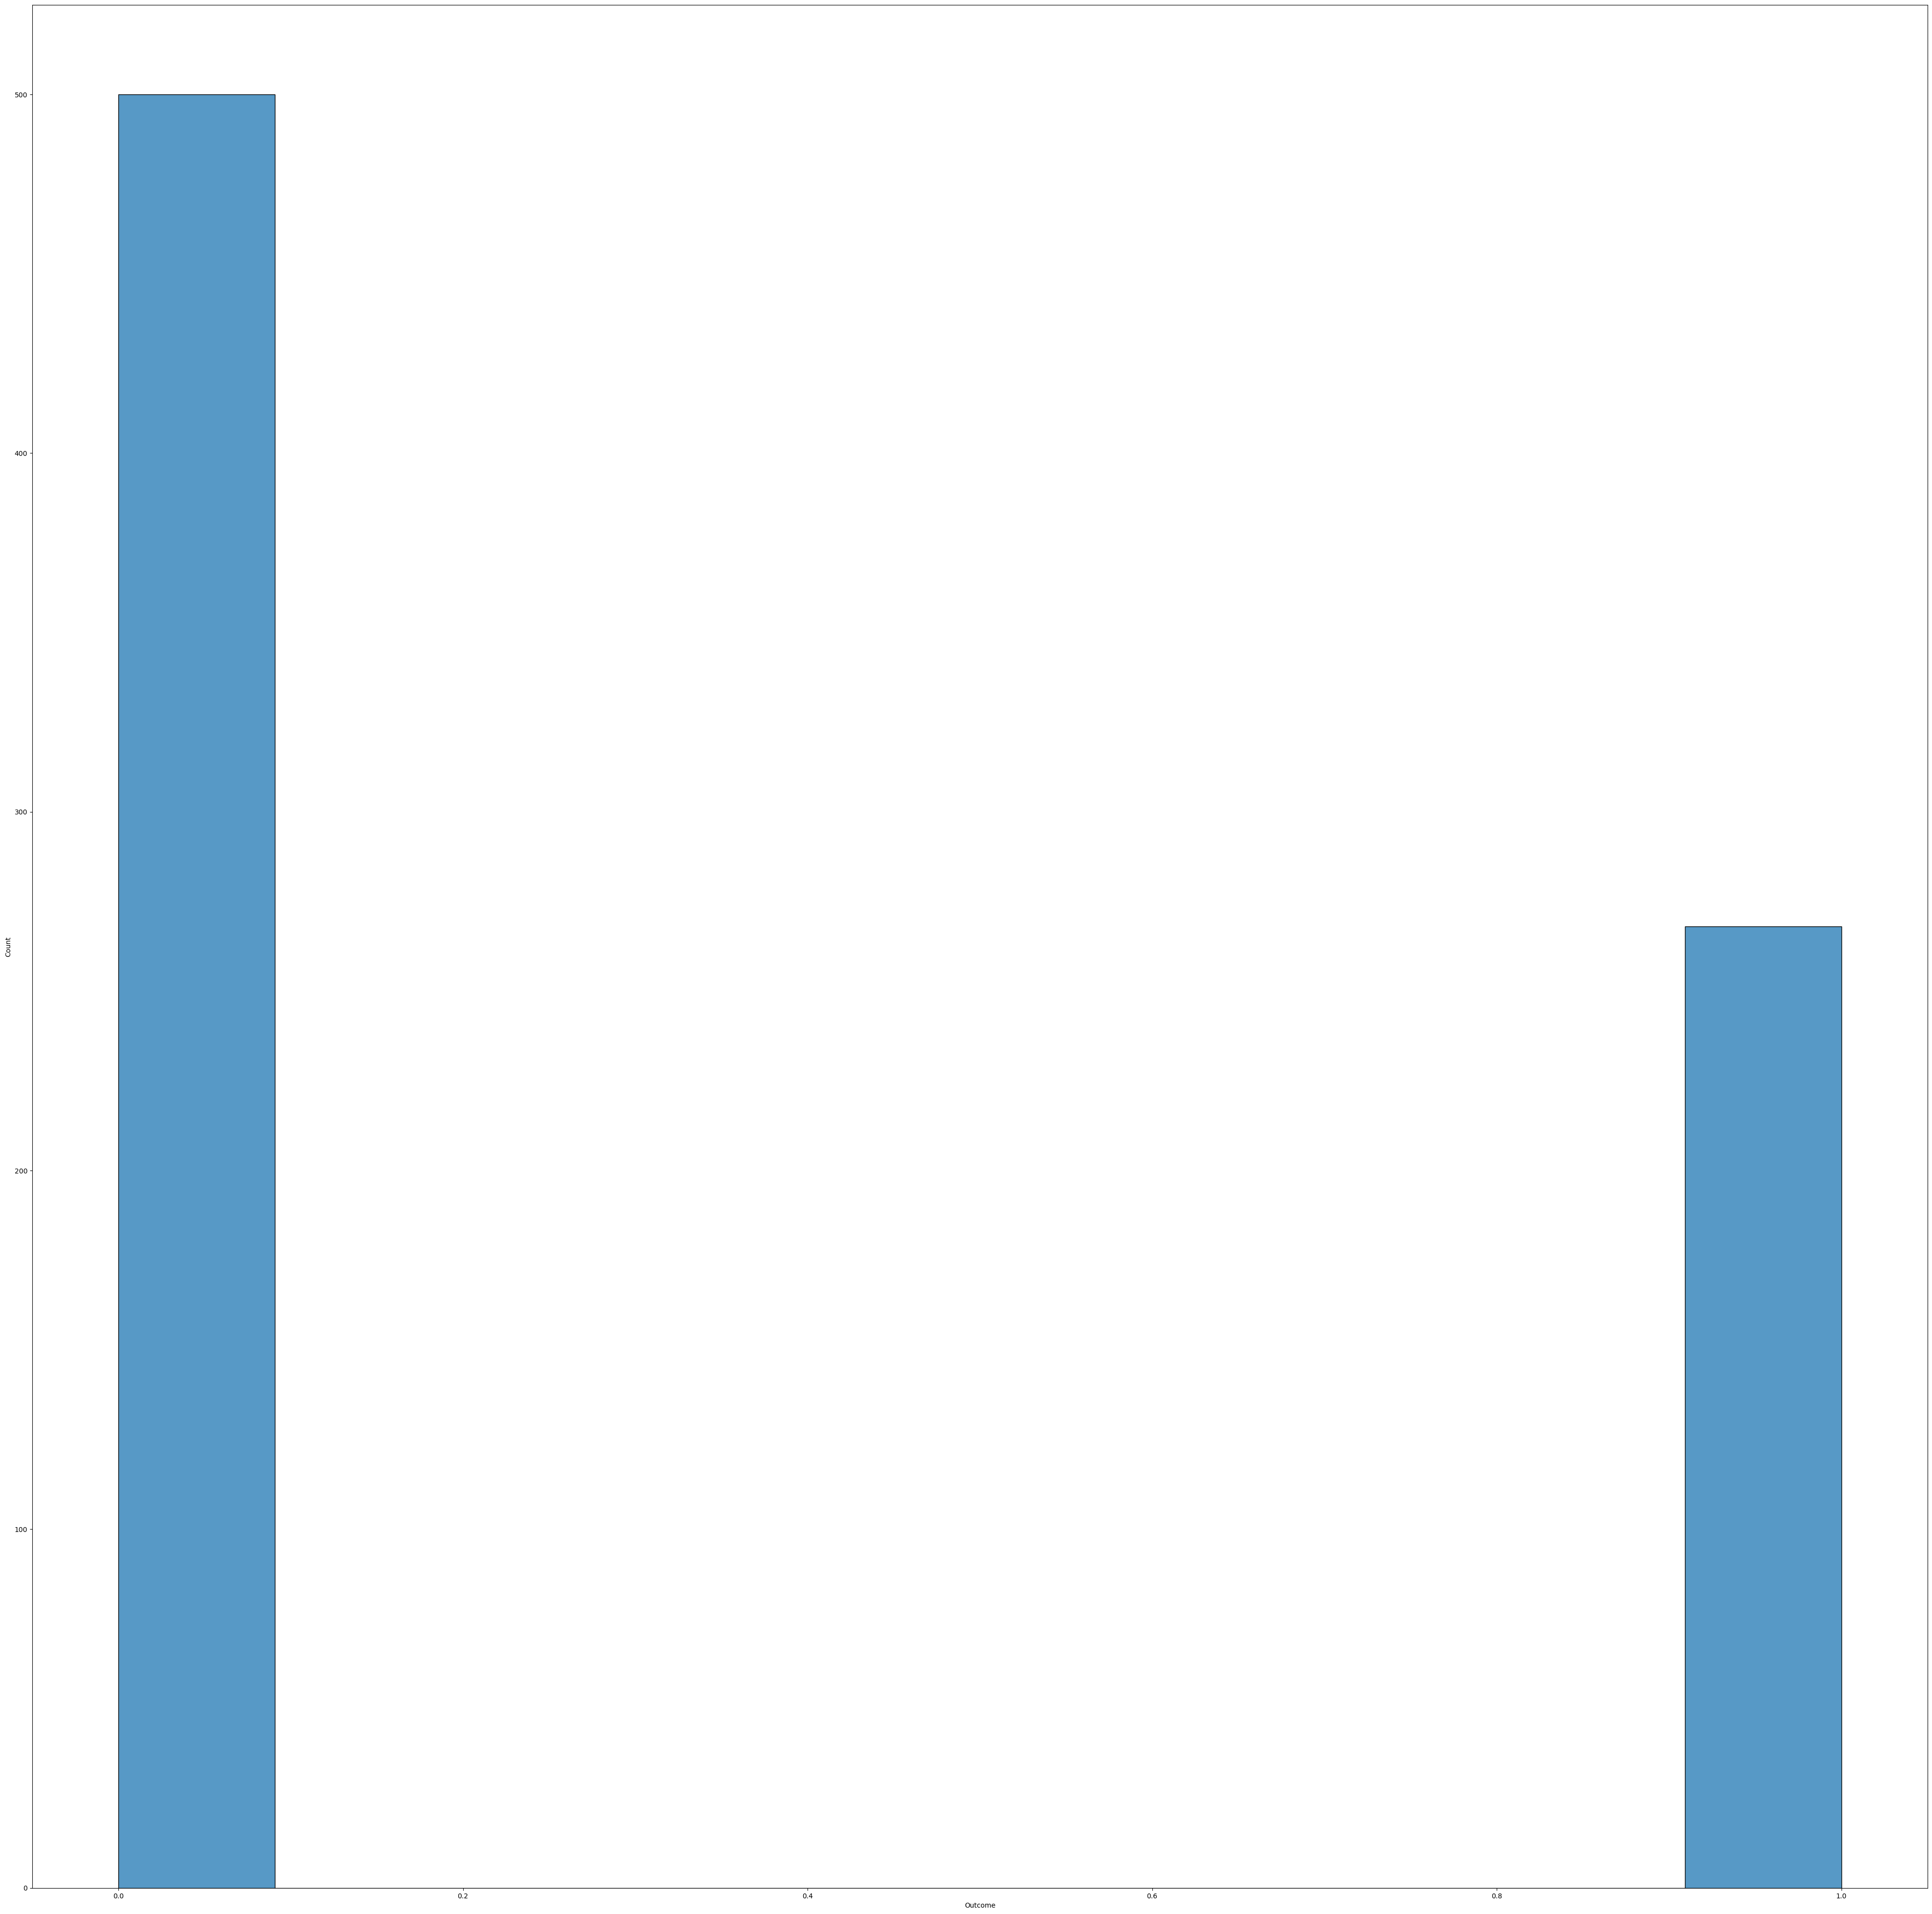

In [14]:
#let us show by plot that datas are not balanced by some plots
sns.histplot(pk.Outcome)

In [15]:
#hence we can see that the datas aree imbalanced 
pk1=pk[pk["Outcome"]==1]
pk1.shape

(268, 9)

In [16]:
pk2=pk[pk["Outcome"]==0]
pk2.shape

(500, 9)

In [17]:
pk2=pk2.sample(n=268)
pk2.shape

(268, 9)

In [18]:
pl=pd.concat([pk1,pk2],axis=0)

In [19]:
pl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
10,4,110,92,0,0,37.6,0.191,30,0
265,5,96,74,18,67,33.6,0.997,43,0
304,3,150,76,0,0,21.0,0.207,37,0
554,1,84,64,23,115,36.9,0.471,28,0


In [20]:
pl.shape

(536, 9)

In [21]:
pl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.041045,125.548507,69.169776,20.828358,81.292910,32.541604,0.485453,34.162313,0.500000
std,3.491805,32.613533,21.256403,16.392853,118.269872,8.223127,0.339544,11.858266,0.500467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.800000,0.249000,25.000000,0.000000
50%,3.000000,122.000000,72.000000,24.000000,0.000000,32.600000,0.380500,30.000000,0.500000
75%,6.000000,147.000000,80.000000,33.000000,130.000000,36.925000,0.641250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000,1.000000


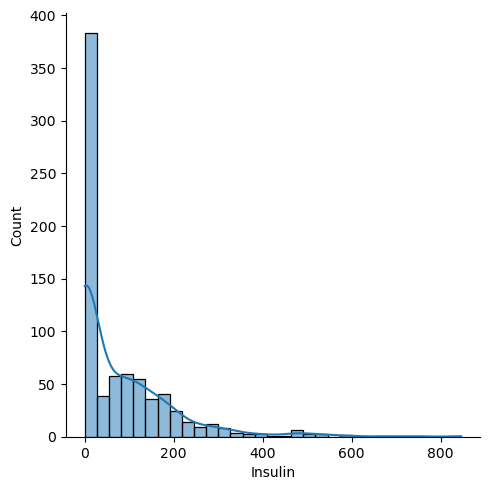

In [22]:
#i think that insulin has the outliers
#let us check it first
sns.displot(pk.Insulin,kde=True)

In [23]:
#since we can see that it is having a outliers
#now let us use z method to remove the outliers
up=pk["Insulin"].mean()+3*pk["Insulin"].std()
up
#since upper boundary is just 425.53

425.53148622068176

In [24]:
#similarly let us check for lower boundary
lp=pk["Insulin"].mean()-3*pk["Insulin"].std()
lp

-265.9325278873484

In [25]:
#since lowerboundary can never be negative anyway let us take it and again process the data
pl=pl[(pl["Insulin"]>lp)&(pl["Insulin"]<up)]

In [26]:
pl.shape
#hence 16 rows with outliers are removed
pl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,4.065134,124.438697,69.047893,20.461686,68.779693,32.437739,0.482623,34.109195,0.490421
std,3.499324,32.179276,21.435427,16.387447,89.905748,8.240470,0.333736,11.772864,0.500388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.800000,0.249500,25.000000,0.000000
50%,3.000000,121.000000,72.000000,23.000000,0.000000,32.500000,0.379000,30.000000,0.000000
75%,6.000000,145.750000,80.000000,33.000000,125.000000,36.800000,0.639250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,402.000000,67.100000,2.420000,72.000000,1.000000


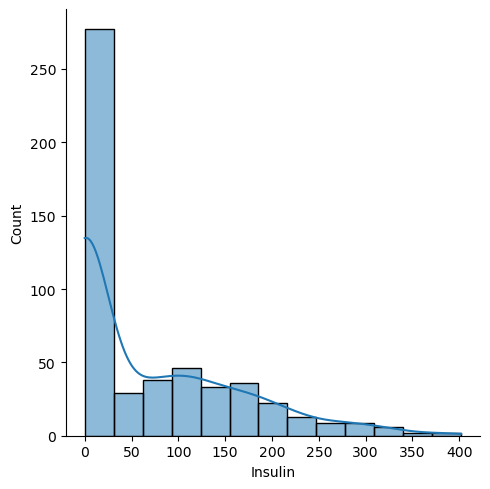

In [27]:
sns.displot(pl.Insulin,kde=True)

In [28]:
#not normally distrubuted anyway better than before
pl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,4.065134,124.438697,69.047893,20.461686,68.779693,32.437739,0.482623,34.109195,0.490421
std,3.499324,32.179276,21.435427,16.387447,89.905748,8.240470,0.333736,11.772864,0.500388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.800000,0.249500,25.000000,0.000000
50%,3.000000,121.000000,72.000000,23.000000,0.000000,32.500000,0.379000,30.000000,0.000000
75%,6.000000,145.750000,80.000000,33.000000,125.000000,36.800000,0.639250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,402.000000,67.100000,2.420000,72.000000,1.000000


In [29]:
#i guess skinthickness too has the outliers
pl.groupby(["SkinThickness"]).size()

SkinThickness
0     163
7       1
8       2
10      3
11      5
12      5
13      7
14      4
15      7
16      4
17      7
18     12
19     10
20     10
21      5
22     10
23      9
24      8
25     11
26     10
27     17
28     10
29     13
30     17
31     14
32     25
33     15
34      5
35     11
36     11
37     14
38      3
39     15
40     10
41      9
42      7
43      4
44      3
45      4
46      6
47      2
48      2
49      2
50      3
51      1
52      1
54      2
56      1
63      1
99      1
dtype: int64

In [30]:
#nnow let us take those data which are just around 47
pl=pl[pl["SkinThickness"]<48]

In [31]:
pl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,4.094488,124.236220,68.803150,19.503937,67.712598,32.191732,0.476012,34.110236,0.490157
std,3.482689,32.136962,21.641708,15.401721,89.812472,8.127318,0.322641,11.768462,0.500396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.700000,0.248750,25.000000,0.000000
50%,3.000000,121.000000,72.000000,22.000000,0.000000,32.400000,0.375000,30.000000,0.000000
75%,6.000000,145.000000,80.000000,32.000000,120.000000,36.600000,0.631750,41.000000,1.000000
max,17.000000,199.000000,122.000000,47.000000,402.000000,67.100000,2.288000,72.000000,1.000000


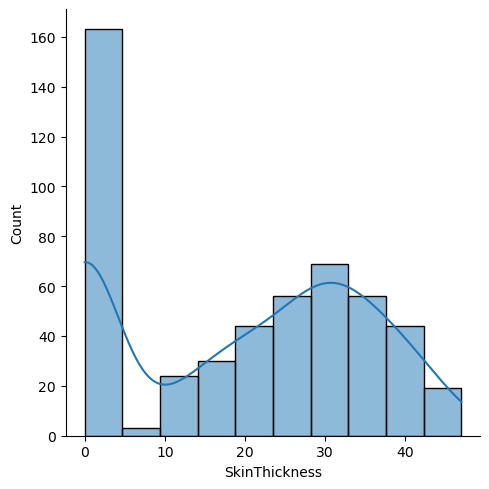

In [32]:
sns.displot(pl.SkinThickness,kde=True)

In [33]:
pl.groupby(["BMI"]).size()

BMI
0.0     10
18.2     2
19.1     1
19.3     1
19.6     1
        ..
52.3     1
52.9     1
55.0     1
57.3     1
67.1     1
Length: 213, dtype: int64

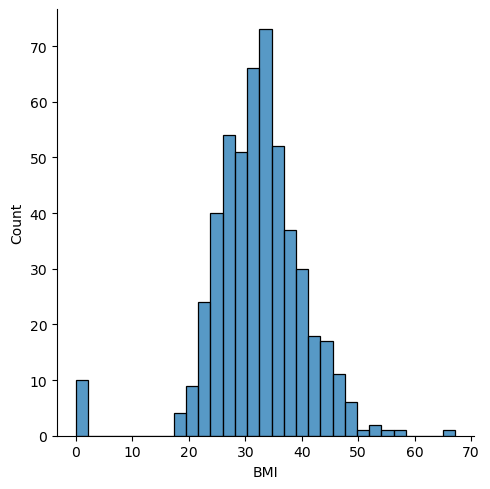

In [34]:
#let us see of Bmi
sns.displot(pl.BMI)

In [35]:
#we can see maximum values are upto 50 so let us make 50 as our max value
pl=pl[pl["BMI"]<50]
pl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,4.089641,124.243028,68.776892,19.404382,67.587649,31.909960,0.476086,34.163347,0.486056
std,3.479328,32.257458,21.301421,15.311334,89.813509,7.729151,0.323676,11.808739,0.500304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.625000,0.248250,25.000000,0.000000
50%,3.000000,120.500000,72.000000,22.000000,0.000000,32.400000,0.375000,30.500000,0.000000
75%,6.000000,145.000000,80.000000,32.000000,120.000000,36.375000,0.635250,41.000000,1.000000
max,17.000000,199.000000,122.000000,47.000000,402.000000,49.600000,2.288000,72.000000,1.000000


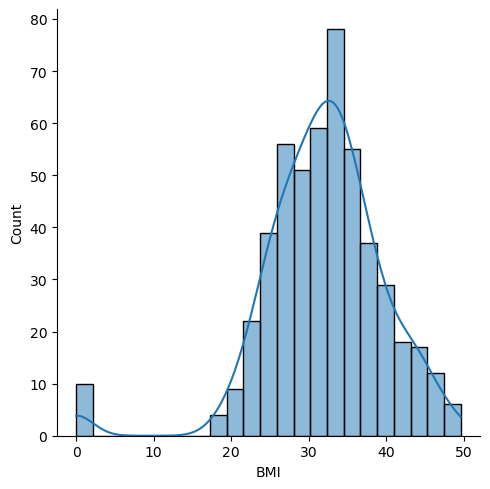

In [36]:
sns.displot(pl.BMI,kde=True)
#ho yesto ma k garni 0 le garda khasai normally distributed dekhexaina

In [37]:
pl.shape

(502, 9)

In [38]:
pl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
10,4,110,92,0,0,37.6,0.191,30,0
265,5,96,74,18,67,33.6,0.997,43,0
304,3,150,76,0,0,21.0,0.207,37,0
554,1,84,64,23,115,36.9,0.471,28,0


In [39]:
pk["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [40]:
key=pk["Pregnancies"].value_counts().index
key

Int64Index([1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 14, 15, 17], dtype='int64')

In [41]:
value=pk["Pregnancies"].value_counts().values
value

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28,  24,  11,  10,
         9,   2,   1,   1])

<BarContainer object of 17 artists>

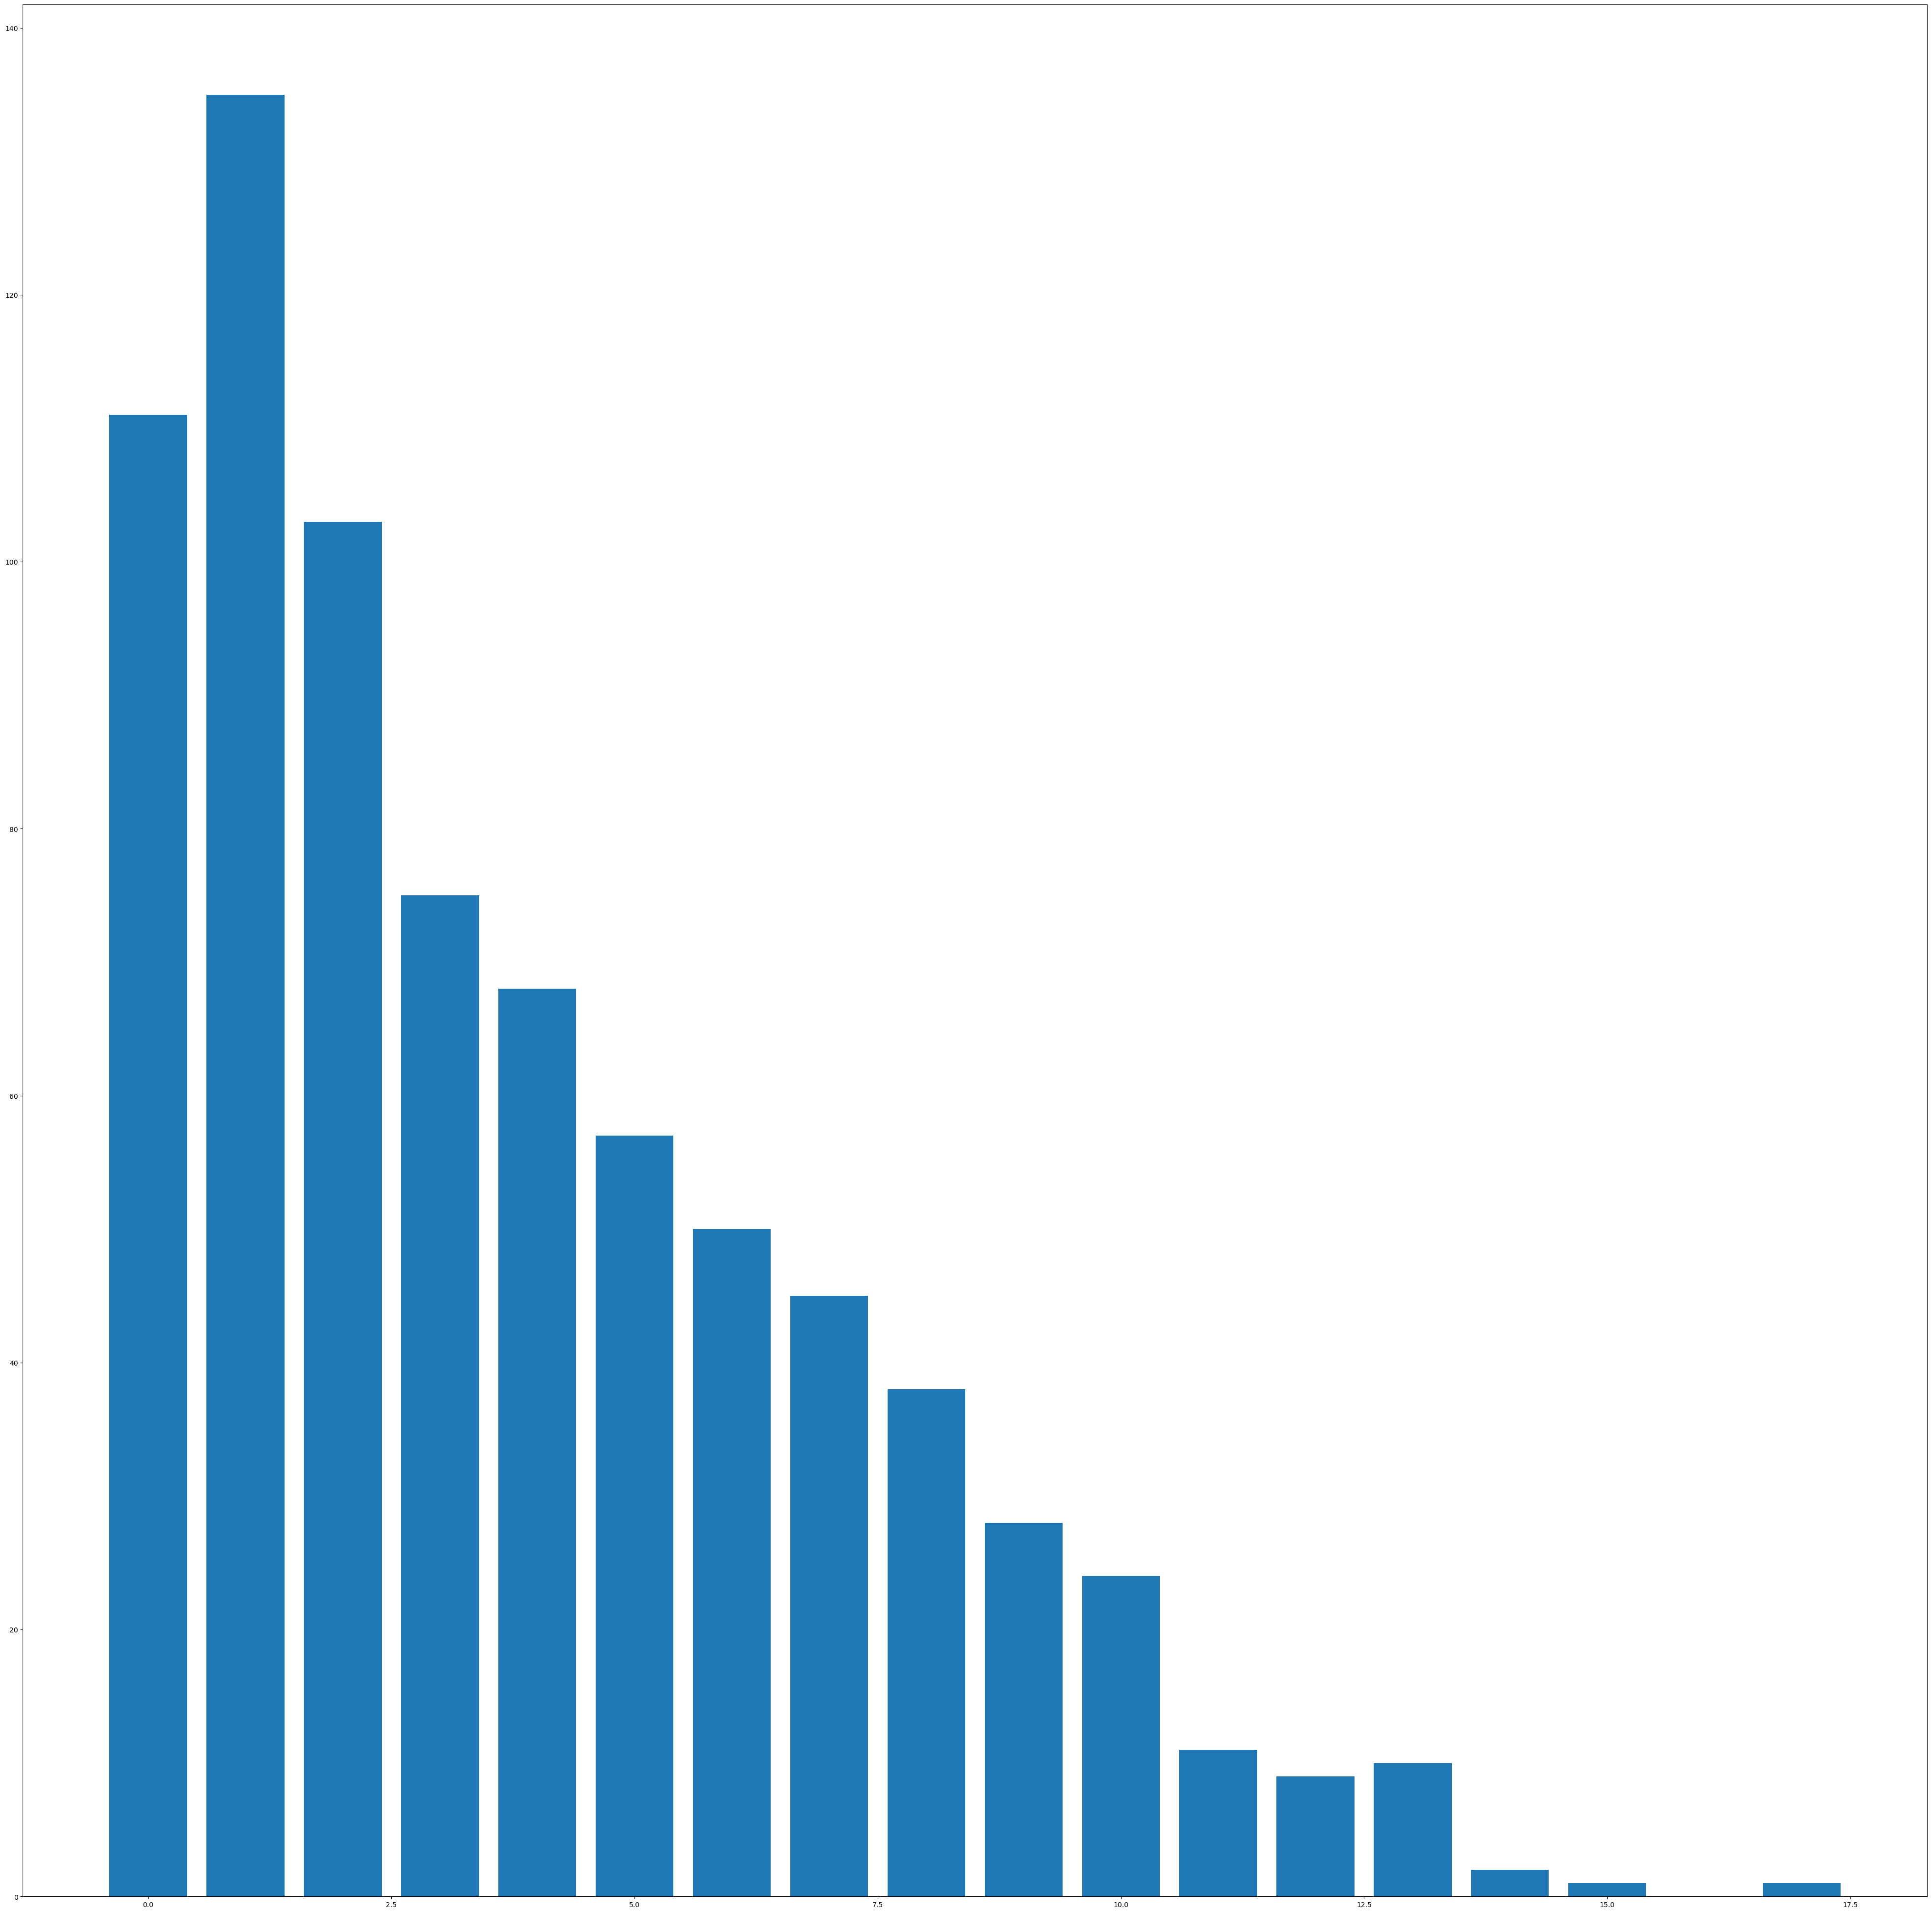

In [42]:
plt.bar(key,value)

In [43]:
#since upto 12 pregnancies is okay but more than that is outliers
pl=pl[pl["Pregnancies"]<=12]

In [44]:
pl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.892276,123.930894,68.678862,19.335366,67.788618,31.801626,0.474841,33.995935,0.477642
std,3.218863,32.332528,21.125426,15.300497,90.193298,7.736140,0.324092,11.861385,0.500008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,100.750000,64.000000,0.000000,0.000000,27.600000,0.248000,25.000000,0.000000
50%,3.000000,120.000000,72.000000,22.000000,0.000000,32.300000,0.370500,30.000000,0.000000
75%,6.000000,145.000000,80.000000,32.000000,120.000000,36.025000,0.631750,41.000000,1.000000
max,12.000000,199.000000,122.000000,47.000000,402.000000,49.600000,2.288000,72.000000,1.000000


In [45]:
cor=pl.corr()

<Axes: >

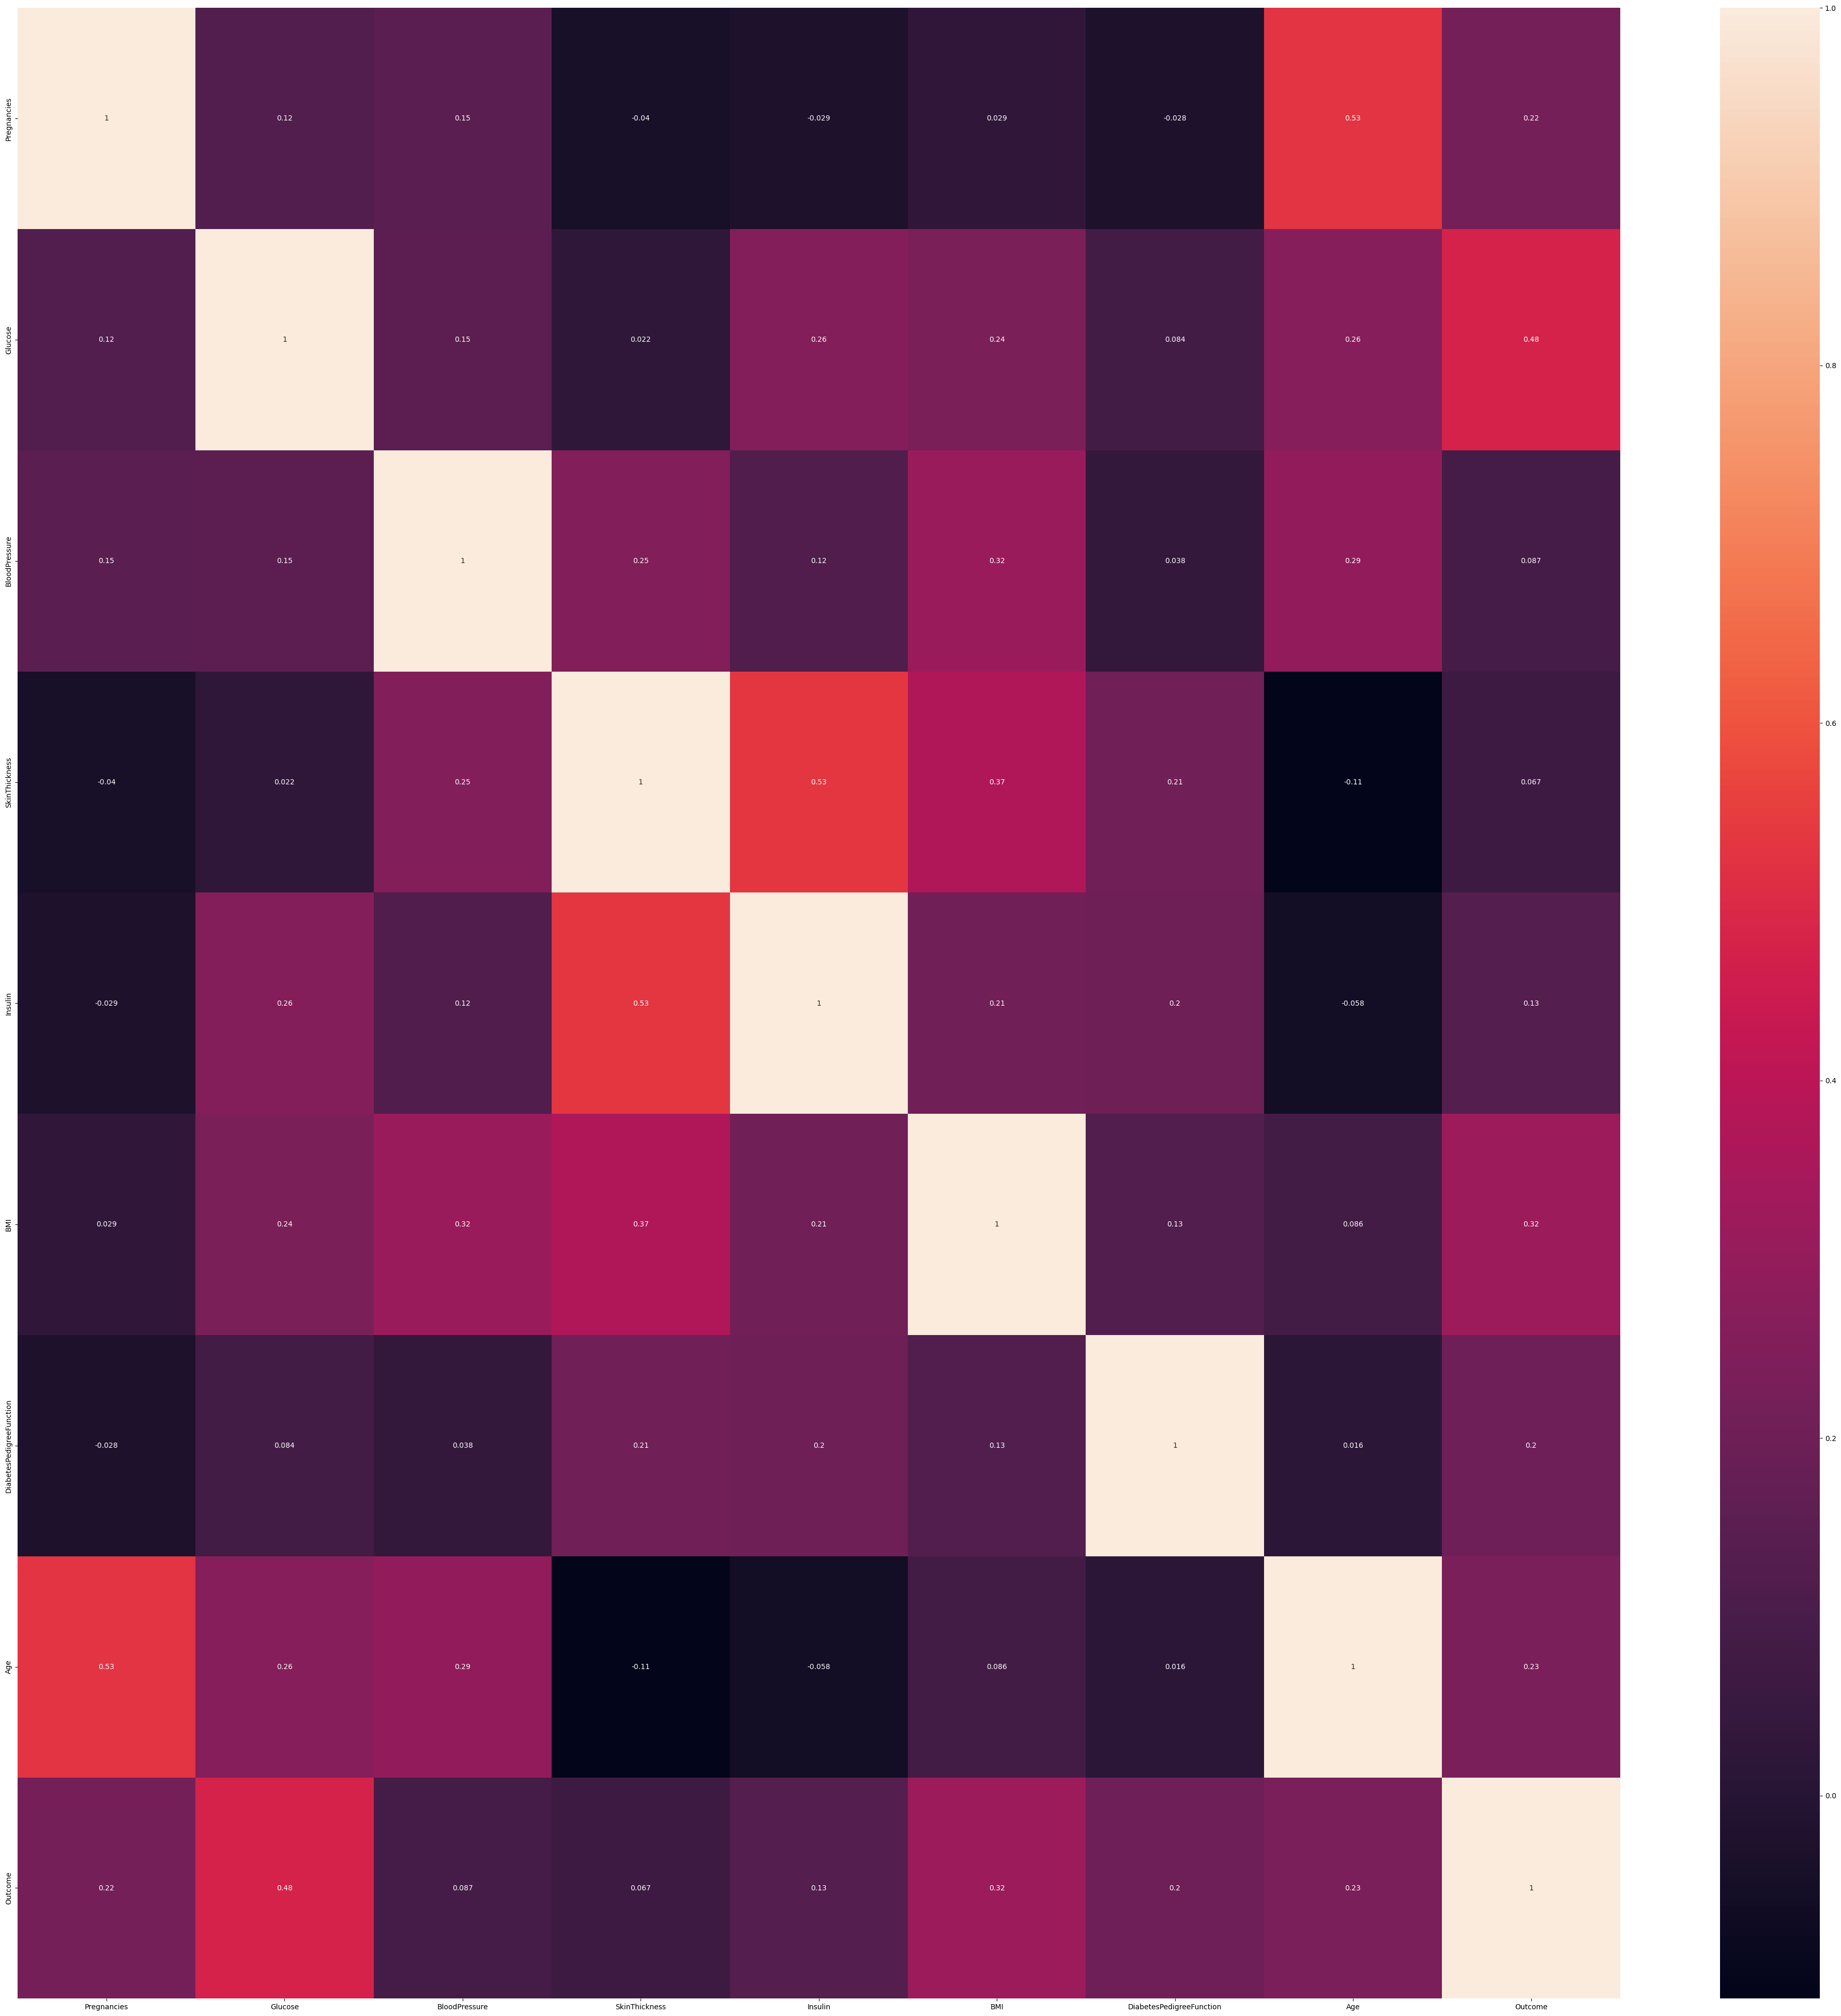

In [46]:
sns.heatmap(cor,annot=True)

In [67]:
pl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
457,5,86,68,28,71,30.2,0.364,24,0
697,0,99,0,0,0,25.0,0.253,22,0
720,4,83,86,19,0,29.3,0.317,34,0
439,6,107,88,0,0,36.8,0.727,31,0


In [52]:
from sklearn.preprocessing import StandardScaler
l=StandardScaler()
pl[["Glucose","BloodPressure","Insulin","Age","BMI","SkinThickness"]]=l.fit_transform(pl[["Glucose","BloodPressure","Insulin","Age","BMI","SkinThickness"]])

/var/folders/28/zbhqfgdn0jnfk1vv_z467qmm0000gn/T/ipykernel_949/1296779196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl[["Glucose","BloodPressure","Insulin","Age","BMI","SkinThickness"]]=l.fit_transform(pl[["Glucose","BloodPressure","Insulin","Age","BMI","SkinThickness"]])


In [53]:
pl
#HENCE YOU CAN SEE THAT DATAS ARE NOW STANDARIZED 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.745182,0.157370,1.024841,-0.752358,0.232701,0.627,1.350631,1
2,8,1.828785,-0.221706,-1.264995,-0.752358,-1.100068,0.672,-0.168443,1
4,0,0.404621,-1.358934,1.024841,1.112204,1.461953,2.288,-0.084050,1
6,3,-1.422024,-0.885089,0.828569,0.224318,-0.103726,0.248,-0.674801,1
9,8,0.033100,1.294599,-1.264995,-0.752358,-4.114971,0.232,1.688203,1
...,...,...,...,...,...,...,...,...,...
10,4,-0.431302,1.105061,-1.264995,-0.752358,0.750281,0.191,-0.337229,0
265,5,-0.864743,0.252139,-0.087365,-0.008753,0.232701,0.997,0.759880,0
304,3,0.807102,0.346908,-1.264995,-0.752358,-1.397676,0.207,0.253522,0
554,1,-1.236264,-0.221706,0.239755,0.523979,0.659704,0.471,-0.506015,0


In [54]:
y=pl.Outcome
y

0      1
2      1
4      1
6      1
9      1
      ..
10     0
265    0
304    0
554    0
684    0
Name: Outcome, Length: 492, dtype: int64

In [56]:
x=pl.drop(columns=["Outcome"],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,0.745182,0.157370,1.024841,-0.752358,0.232701,0.627,1.350631
2,8,1.828785,-0.221706,-1.264995,-0.752358,-1.100068,0.672,-0.168443
4,0,0.404621,-1.358934,1.024841,1.112204,1.461953,2.288,-0.084050
6,3,-1.422024,-0.885089,0.828569,0.224318,-0.103726,0.248,-0.674801
9,8,0.033100,1.294599,-1.264995,-0.752358,-4.114971,0.232,1.688203
...,...,...,...,...,...,...,...,...
10,4,-0.431302,1.105061,-1.264995,-0.752358,0.750281,0.191,-0.337229
265,5,-0.864743,0.252139,-0.087365,-0.008753,0.232701,0.997,0.759880
304,3,0.807102,0.346908,-1.264995,-0.752358,-1.397676,0.207,0.253522
554,1,-1.236264,-0.221706,0.239755,0.523979,0.659704,0.471,-0.506015


In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=40)

In [60]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
26,7,0.714221,0.346908,-1.264995,-0.752358,0.983192,0.257,0.759880
116,5,0.002140,0.252139,-1.264995,-0.752358,0.284459,0.220,0.337915
10,4,-0.431302,1.105061,-1.264995,-0.752358,0.750281,0.191,-0.337229
175,8,1.704944,0.157370,1.482808,0.690458,0.116245,0.719,0.169129
536,0,-0.586102,1.010292,-1.264995,-0.752358,-0.284879,0.197,1.013059
...,...,...,...,...,...,...,...,...
453,2,-0.152661,-3.254314,-1.264995,-0.752358,-1.578829,0.832,3.207277
540,8,-0.740903,0.252139,1.351960,1.633838,0.983192,0.661,0.759880
15,7,-0.740903,-3.254314,-1.264995,-0.752358,-0.233121,0.484,-0.168443
730,3,0.187900,0.441678,0.239755,0.124430,-0.440153,0.323,0.000343


In [61]:
x_test.shape

(123, 8)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [65]:
lr=cross_val_score(LogisticRegression(),x_train,y_train,cv=5)
lr.sum()/len(lr)

0.7207700851536468

In [67]:
dtc=cross_val_score( DecisionTreeClassifier(),x_train,y_train,cv=5)
dtc.sum()/len(dtc)

0.6909292854498333

In [70]:
knn=cross_val_score(KNeighborsClassifier(),x_train,y_train,cv=5)
knn.sum()/len(knn)

0.7126619770455387

In [72]:
svm=cross_val_score(SVC(),x_train,y_train,cv=5)
svm.sum()/len(svm)

0.7262125138837469

In [74]:
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5)
rfc.sum()/len(rfc)

0.7207700851536467

In [75]:
#here we can see that support vector machine is performing really well with this problem
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [77]:
yp=sv.predict(x_test)
yp

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [80]:
from sklearn.metrics import recall_score

In [81]:
recall_score(y_test,yp)

0.6724137931034483

In [82]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [83]:
lc= confusion_matrix(y_test,yp)

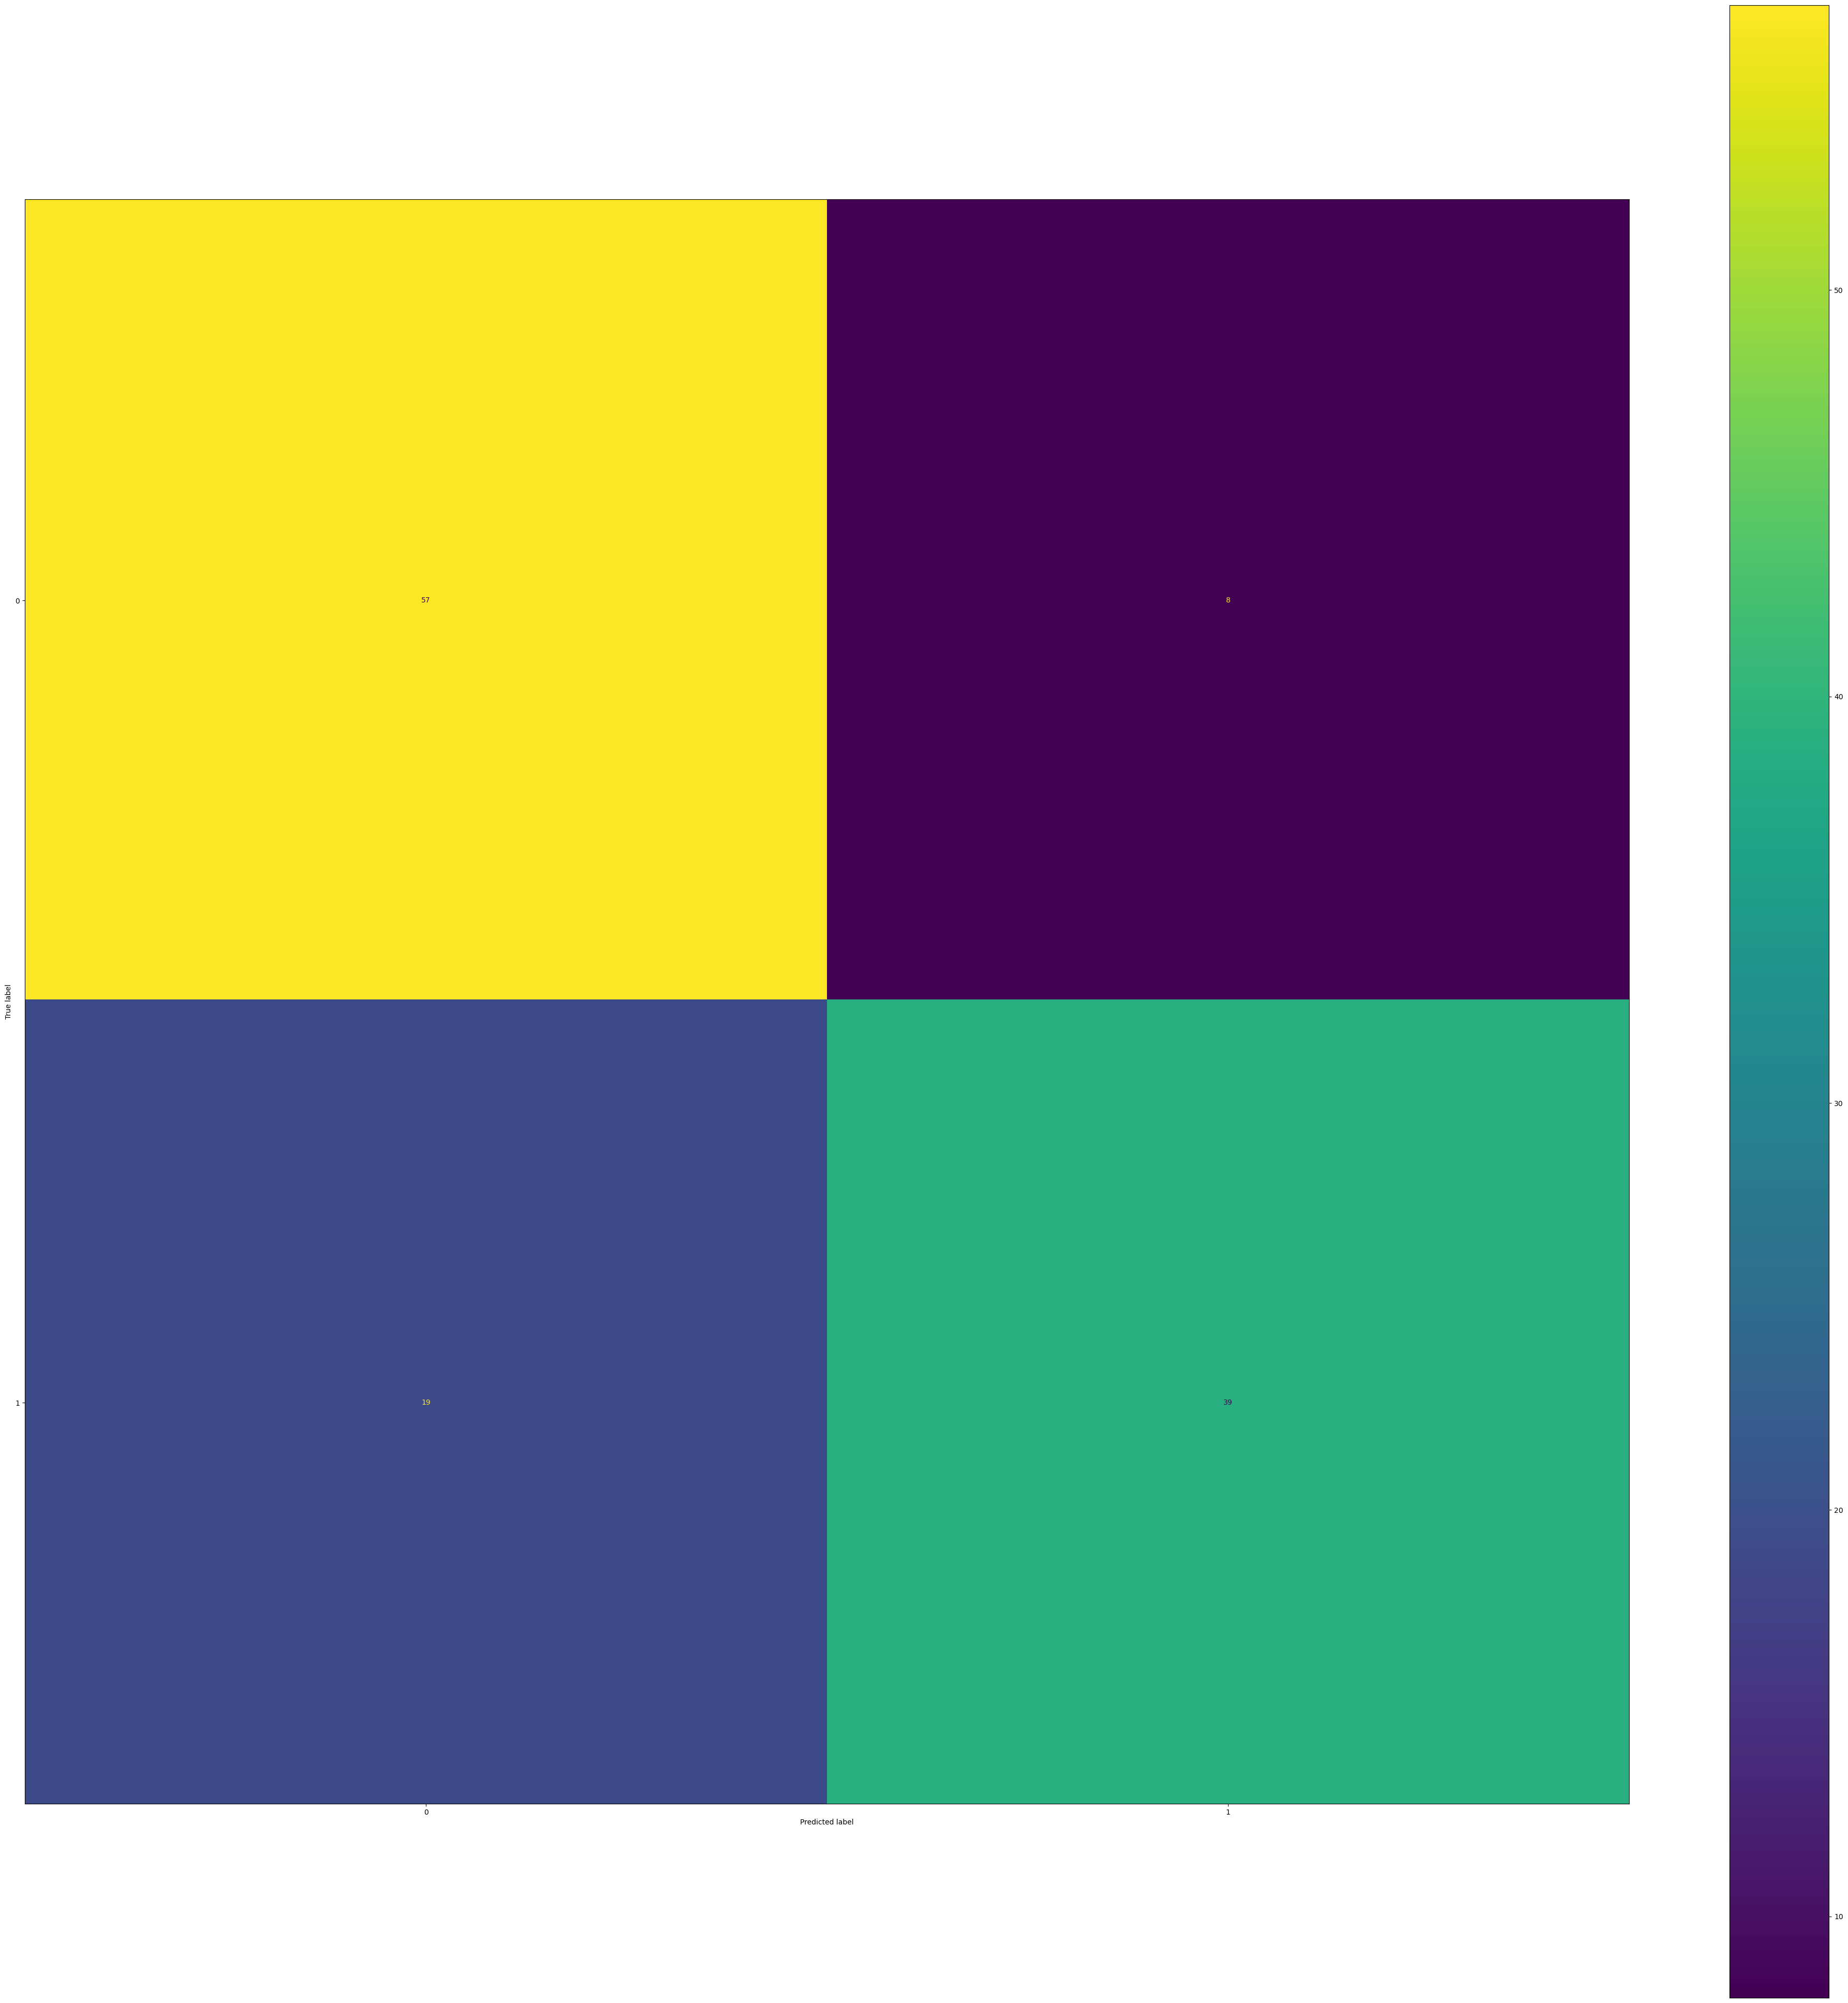

In [84]:
cd=ConfusionMatrixDisplay(lc)
cd.plot()

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yp)

0.7804878048780488

In [86]:
pl.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,492.000000,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,492.000000,4.920000e+02,492.000000
mean,3.892276,2.888385e-17,-7.220963e-18,-3.610481e-18,-1.444193e-17,2.888385e-17,0.474841,-2.888385e-17,0.477642
std,3.218863,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00,0.324092,1.001018e+00,0.500008
min,0.000000,-3.836911e+00,-3.254314e+00,-1.264995e+00,-7.523576e-01,-4.114971e+00,0.088000,-1.096766e+00,0.000000
25%,1.000000,-7.176825e-01,-2.217055e-01,-1.264995e+00,-7.523576e-01,-5.436694e-01,0.248000,-7.591939e-01,0.000000
50%,3.000000,-1.217008e-01,1.573705e-01,1.743307e-01,-7.523576e-01,6.448710e-02,0.370500,-3.372289e-01,0.000000
75%,6.000000,6.523013e-01,5.364465e-01,8.285694e-01,5.794724e-01,5.464835e-01,0.631750,5.910940e-01,1.000000
max,12.000000,2.324146e+00,2.526596e+00,1.809928e+00,3.709273e+00,2.303021e+00,2.288000,3.207277e+00,1.000000
